# Estatística Probabilidade e Amostragem - Desafio Final

Bootcamp Data Analytics 2024

*Autor: Letícia Simões*

## Proposta do desafio
Utilizando a base de dados do arquivo `populacao_brasileira.csv` (os dados são fictícios). Imagine-se como uma pesquisadora analisando as características da força de trabalho nos diferentes estados do Brasil. Responda às perguntas a seguir.

## Conhecendo a base de dados

In [ ]:
# Bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Importação da base de dados
df = pd.read_csv('populacao_brasileira.csv')

# Renomeando a primeira coluna
df = df.rename(columns={'Unnamed: 0': 'id'})

In [ ]:
# Visualizando os dados
df.head()

,id,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
# Estatísticas descritivas das variáveis numéricas
df.describe()

,id,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


In [ ]:
# Estatísticas descritivas das variáveis categóricas
df.describe(include=['object'])

,estado,escolaridade,nível de proficiência em inglês,sexo
count,1000,1000,1000,1000
unique,27,4,3,2
top,AP,Fundamental,Avançado,F
freq,48,266,344,514


In [ ]:
# Valores únicos por variáveis categóricas
for column in df.select_dtypes(include=['object']):
  print(f"\nValores únicos para a coluna '{column}':")
  print(df[column].unique())


Valores únicos para a coluna 'estado':
['MA' 'BA' 'AM' 'CE' 'SE' 'DF' 'PI' 'AP' 'AC' 'SC' 'SP' 'GO' 'RO' 'PA'
 'MS' 'RN' 'RS' 'RR' 'PR' 'MG' 'MT' 'TO' 'PB' 'PE' 'RJ' 'AL' 'ES']

Valores únicos para a coluna 'escolaridade':
['Fundamental' 'Superior' 'Médio' 'Pós-graduação']

Valores únicos para a coluna 'nível de proficiência em inglês':
['Intermediário' 'Básico' 'Avançado']

Valores únicos para a coluna 'sexo':
['F' 'M']


In [ ]:
# Valores faltantes
df.isnull().sum()

id                                 0
estado                             0
idade                              0
escolaridade                       0
nível de proficiência em inglês    0
renda                              0
sexo                               0
dtype: int64

## Exercício 01.

**Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês? Considere fluente quem tem o nível avançado.**

### Código

In [ ]:
# df = Amostra: Conjunto total de pessoas na população Brasileira

# TP = Total de pessoas
TP = df.shape[0]

# TP_FE = Total de pessoas fluentes em inglês
TP_FE = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]

# IPFE = Probabilidade de uma pessoa ser fluente em inglês
IP_FE = TP_FE / TP

# CO_FE = Probabilidade Complementar
CO_FE = 1 - IP_FE

round(CO_FE * 100, 2)

65.6

### Resposta:

A probabilidade de uma pessoa escolhida aleatoriamente não ser fluente em inglês é 65,6%.

## Exercício 02.

**Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?**

### Código

In [ ]:
# df_PA_AL = Amostra: Conjunto de pessoas que são dos estados Pará e Alagoas
df_PA_AL = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

# TP_PA_AL = Total de pessoas dos estados Pará e Alagoas
TP_PA_AL = df_PA_AL.shape[0]

# TP_PA_AL_Renda_Superior = Total de pessoas dos estados Pará e Alagoas que possuem renda superior a R$ 5.000,00
TP_PA_AL_Renda_Superior = df_PA_AL[df_PA_AL['renda'] > 5000].shape[0]

# IP_TP_PA_AL_Renda_Superior  = Probabilidade de uma pessoa dos estados Pará e Alagoas escolhida aleatoriamente ter renda superior a R$ 5.000
IP_TP_PA_AL_Renda_Superior = TP_PA_AL_Renda_Superior / TP_PA_AL

round(IP_TP_PA_AL_Renda_Superior * 100, 2)

5.06

### Resposta:

A probabilidade de uma pessoa escolhida aleatoriamente ser natural de Alagoas ou do Pará e ter uma renda superior a R$ 5.000,00 é de 5,06%.

## Exercício 03.

**Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?**

### Código:

In [ ]:
# df_AM = Amostra: Conjunto de pessoas que são do estado Amazonas
df_AM = df[(df['estado'] == 'AM')]

# TP_AM = Total de pessoas do estado Amazonas
TP_AM = df_AM.shape[0]

# TP_AM_ENSINO_SUPERIOR = Total de pessoas que possuem ensino superior
TP_AM_ENSINO_SUPERIOR = df_AM[(df_AM['escolaridade'] == 'Superior') | (df_AM['escolaridade'] == 'Pós-graduação')].shape[0]

# IP_TP_AM_ENSINO_SUPERIOR = Probabilidade de uma pessoa do estado Amazonas possuir ensino superior
IP_TP_AM_ENSINO_SUPERIOR = TP_AM_ENSINO_SUPERIOR / TP_AM

# CO_TP_AM_ENSINO_SUPERIOR = Probabilidade complementar
CO_TP_AM_ENSINO_SUPERIOR = 1 - IP_TP_AM_ENSINO_SUPERIOR

# IP_TP_AM_ENSINO_SUPERIOR_QUINTA_PESSOA = Probabilidade da quinta pessoa do estado Amazonas, escolhida aleatoriamente, possuir ensino superior
IP_TP_AM_ENSINO_SUPERIOR_QUINTA_PESSOA = (CO_TP_AM_ENSINO_SUPERIOR ** 4) * IP_TP_AM_ENSINO_SUPERIOR

round(IP_TP_AM_ENSINO_SUPERIOR_QUINTA_PESSOA * 100, 2)

2.21

### Resposta:

A probabilidade de escolher aleatoriamente a quinta pessoa do estado do Amazonas e ela ter ensino superior completo é de 2,21%.

## Exercício 04.

**Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?**

### Código

In [ ]:
# Intervalos de rendas
intervalo_renda = np.arange(0, df['renda'].max() + 1500, 1500)

# Total de pessoas por intervalo de renda
TP_por_faixa = pd.cut(df['renda'], bins=intervalo_renda).value_counts().sort_index()

# Porcentagem de pessoas por intervalo de renda
porcentagem_por_faixa = (TP_por_faixa / df.shape[0]) * 100

# Função de Densidade de Probabilidade = Porcentagem de pessoas / Largura da Faixa
densidade_probabilidade = (porcentagem_por_faixa / 100) / 1500

print("Função de Densidade de Probabilidade:")
for I, densidade in enumerate(densidade_probabilidade):
  print(f"Faixa {I + 1}: {densidade:.6f}")

Função de Densidade de Probabilidade:
Faixa 1: 0.000037
Faixa 2: 0.000276
Faixa 3: 0.000295
Faixa 4: 0.000059


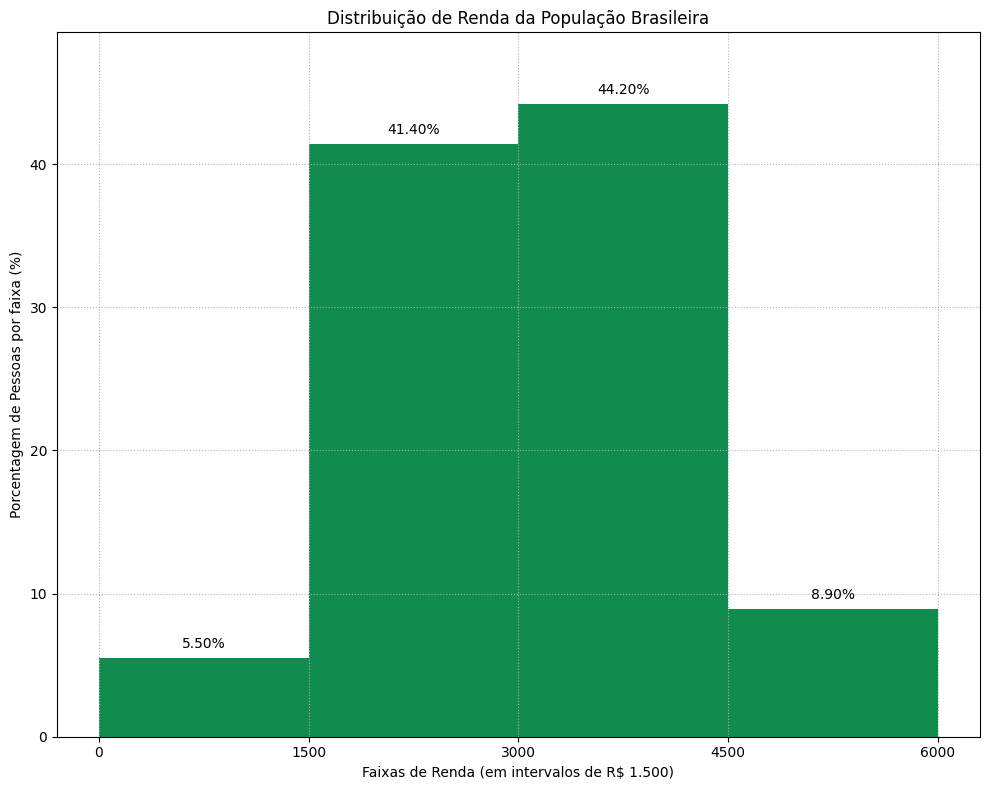

In [ ]:
# Plotagem do histograma
plt.figure(figsize=(10, 8))
bars = plt.bar(intervalo_renda[:-1], porcentagem_por_faixa, width=1500, align='edge', color='#118C4F')

plt.xlabel('Faixas de Renda (em intervalos de R$ 1.500)')
plt.ylabel('Porcentagem de Pessoas por faixa (%)')
plt.title('Distribuição de Renda da População Brasileira')
plt.xticks(intervalo_renda)
plt.ylim(0, max(porcentagem_por_faixa) + 5)

for bar, percent in zip(bars, porcentagem_por_faixa):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

plt.grid(linestyle=':')
plt.tight_layout()
plt.show()


### Resposta:

A análise da distribuição de renda da população brasileira, dividida em faixas de valores com intervalo de 1.500 reais, revela alguns padrões.

O histograma apresentado destaca que a maior concentração de renda se encontra na faixa de 3.000 a 4.500 reais, abrangendo 44,20% da população.

Além disso, a função de densidade de probabilidade sugere que essa faixa específica de renda possui uma densidade de probabilidade de 0.000295.

## Exercício 05.

**Calcule a média e a variância da renda da amostra. Depois, faça a distribuição normal, inclua o gráfico.**

### Código

In [ ]:
# Média da renda da população brasileira
renda_media = df['renda'].mean()
round(renda_media, 2)

3082.54

In [ ]:
# Variância da renda da população brasileira
variancia = df['renda'].var()
round(variancia, 2)

993156.23

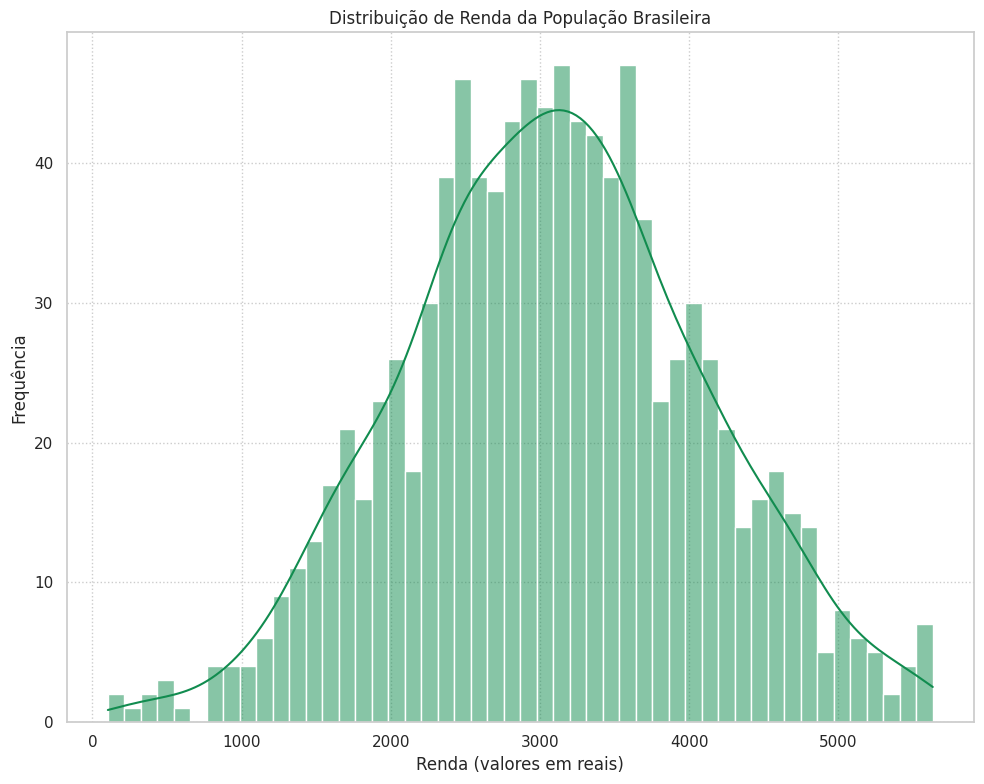

In [ ]:
# Plotando o histograma
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.histplot(df['renda'], bins=50, color='#118C4F', kde=True)

plt.title('Distribuição de Renda da População Brasileira')
plt.xlabel('Renda (valores em reais)')
plt.ylabel('Frequência')

plt.grid(linestyle=':')

plt.tight_layout()
plt.show()

### Resposta:

A análise da renda da população brasileira revela uma renda média de 3.082,54 reais. Já a variância é equivalente a 993.156,23.

O histograma demonstra uma distribuição normal e simétrica, indicando que a maioria da população possui uma renda próxima à média. Especificamente nesta amostra, observa-se que a maior concentração de renda está entre 3.000 e 3.500 reais.

Esses padrões sugerem uma estrutura econômica onde a renda é relativamente uniforme em torno do valor médio, com variação considerável em ambas as direções.

## Exercício 06.

**Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?**

### Código

In [ ]:
# df = Amostra: Conjunto total de pessoas na população Brasileira

# TP = Total de pessoas
TP = df.shape[0]

# TP_POS = Total de pessoas com Pós-graduação
TP_POS = df[df['escolaridade'] == 'Pós-graduação'].shape[0]

# IPPOS = Probabilidade de uma pessoa ter Pós-graduação
IPPOS = TP_POS / TP

round(IPPOS * 100, 2)

25.3

In [ ]:
# Calcular distribuição binomial PMF

# n = Novo tamanho da amostra
n = 1000000

# k = Número de pessoas com pós-graduação (caso de sucesso)
k = 243000

# p = Probabilidade de uma pessoa ter pós-graduação
p = IPPOS

# IPPOS_NOVA = Probabilidade de uma pessoa ter Pós-graduação considerando o nome tamanho da amostra
IPPOS_NOVA = stats.binom.pmf(k, n, p)

IPPOS_NOVA

1.1104854289794913e-119

### Resposta:

A partir da amostra representativa da população brasileira, composta por 1000 habitantes, determinamos que a probabilidade de um indivíduo selecionado aleatoriamente possuir um nível de escolaridade de pós-graduação é de 25,30%.

Entretanto, ao ampliarmos essa amostra para 1 milhão de habitantes, a probabilidade de encontrarmos 243.000 pessoas com pós-graduação é extremamente baixa, sendo inferior a 0,00001%.


## Exercício 07.

**Somando as densidades, nós temos a função de densidade acumulada. Considerando a coluna `Escolaridade` faça a função de densidade acumulada discreta para cada nível de escolaridade.**

### Código

In [ ]:
# df = Amostra: Conjunto total de pessoas na população Brasileira

# TP = Total de pessoas
TP = df.shape[0]

# TP_ESCOLARIDADE = Total de pessoas por escolaridade
TP_ESCOLARIDADE = df['escolaridade'].value_counts().sort_index()

# POSESCOLARIDADE = Probabilidade por nível de escolaridade
POSESCOLARIDADE = TP_ESCOLARIDADE / TP

# DENESCOLARIDADE = Densidade acumulada
DENESCOLARIDADE = POSESCOLARIDADE.cumsum()

print(f"Função de Densidade Acumulada Discreta por nível de escolaridade:\n{DENESCOLARIDADE}")

Função de Densidade Acumulada Discreta por nível de escolaridade:
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: escolaridade, dtype: float64


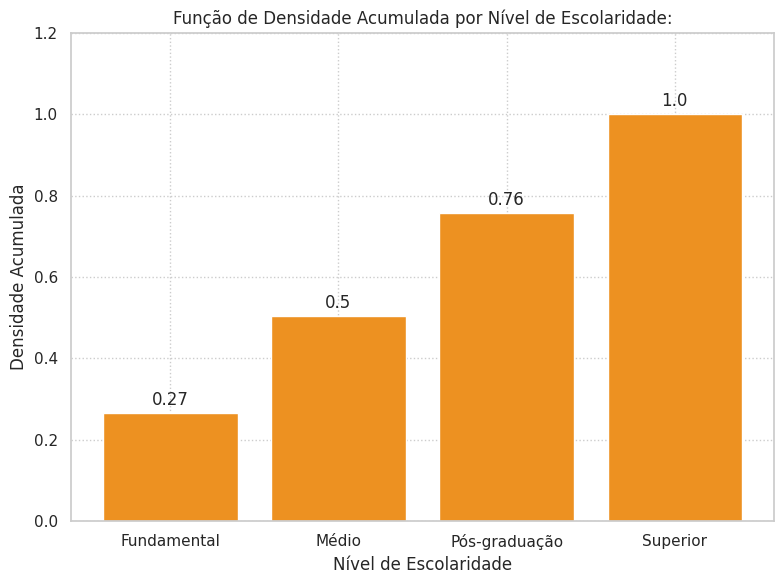

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(DENESCOLARIDADE.index, DENESCOLARIDADE, color='#ED9121')

max_height = max(bar.get_height() for bar in bars)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max_height * 0.01, round(yval, 2), ha='center', va='bottom')

plt.title('Função de Densidade Acumulada por Nível de Escolaridade:')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Densidade Acumulada')
plt.ylim(0, 1.2)
plt.grid(linestyle=':')

plt.tight_layout()
plt.show()

### Resposta:

A Função de Distribuição Acumulada (FDA) é uma ferramenta estatística que mostra a probabilidade acumulada de uma variável aleatória ser menor ou igual a um valor específico.

No caso da amostra da população brasileira que estamos analisando, a FDA nos dá uma visão detalhada da proporção acumulada de pessoas em cada nível de escolaridade, ajudando a entender como a educação está distribuída nessa população.

## Exercício 08.

**Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?**

### Código

In [ ]:
# df = Amostra: Conjunto total de pessoas na população Brasileira

# TP = Total de pessoas
TP = df.shape[0]

# TP_II = Total de pessoas com nível de inglês intermediário
TP_II = df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0]

# IPII = Probabilidade de uma pessoa com nível de inglês intermediário
IP_II = TP_II / TP

# CO_II = Probabilidade Complementar
CO_II = 1 - IP_II

# Margem de erro amostral - Fórmula: Z * np.sqrt((p * (1 - p)) / n)
confianca = 0.95
Z = stats.norm.ppf(1 - (1 - confianca) / 2)
margem_erro = Z * np.sqrt((IP_II * CO_II) / TP)

# Intervalo de Confiança
intervalo_inferior = IP_II - margem_erro
intervalo_superior = IP_II + margem_erro

print(f"Probabilidade: {round(IP_II * 100, 2)}%")
print(f"Intervalo de confiança: {round(intervalo_inferior * 100, 2)}% a {round(intervalo_superior * 100, 2)}%")
print(f"Margem de erro: {round(margem_erro * 100, 2)}%")

Probabilidade: 32.9%
Intervalo de confiança: 29.99% a 35.81%
Margem de erro: 2.91%


### Resposta:

A probabilidade de pessoas com nível de inglês intermediário dentro da amostra populacional é de 32.90%, com uma margem de erro de 2.91%. Isso nos dá um intervalo de confiança de 29.99% a 35.81%.

## Exercício 09

**Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?**

### Código

In [ ]:
# Renda média e Renda deseja
renda_media = df['renda'].mean()
renda_desejada = renda_media + 1000

print(f"Renda média: R${round(renda_media, 2)}")
print(f"Renda desejada: R${round(renda_desejada, 2)}")

Renda média: R$3082.54
Renda desejada: R$4082.54


In [ ]:
# df = Amostra: Conjunto total de pessoas na população Brasileira

# TP = Total de pessoas
TP = df.shape[0]

# TP_RENDA = Total de pessoas com renda mil reais superior à média
TP_RENDA = df[df['renda'] >= renda_desejada].shape[0]

# IPRENDA = Probabilidade de uma pessoa ter uma renda mil reais superior à média
IPRENDA = TP_RENDA / TP

round(IPRENDA * 100, 2)

16.1

In [ ]:
# Probabilidade de encontrar 60 pessoas com a renda desejada

# n = Tamanho da amostra
n = TP

# k = Número específico de pessoas (caso de sucesso)
k = 60

# p = Probabilidade de uma pessoa ter a renda desejada
p = IPRENDA

# IPRENDA_NOVA = Probabilidade de encontrar 60 pessoas com a renda desejada
IPRENDA_NOVA = stats.binom.pmf(k, n, p)

IPRENDA_NOVA

1.099520565163774e-22

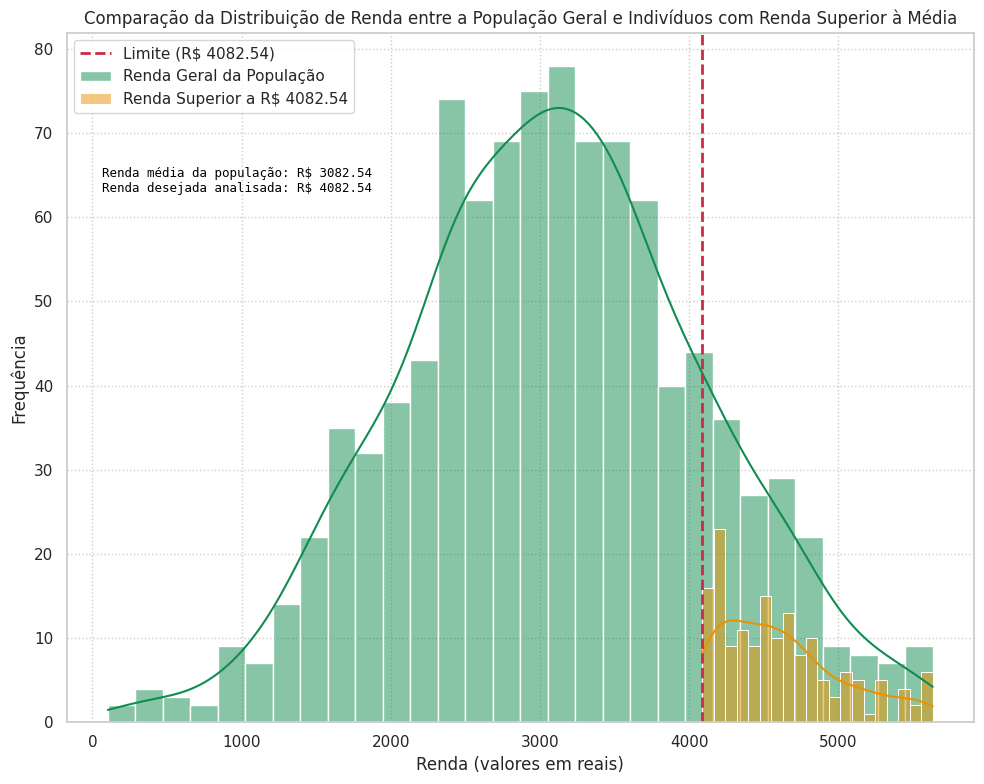

In [ ]:
# Plotando o histograma
sns.set(style="whitegrid")

df_Renda_Desejada = df[df['renda'] >= renda_desejada]

plt.figure(figsize=(10, 8))
sns.histplot(df['renda'], bins=30, color='#118C4F', label='Renda Geral da População', kde=True)
sns.histplot(df_Renda_Desejada['renda'], bins=20, color='#E99204', label=f'Renda Superior a R$ {renda_desejada:.2f}', kde=True)
plt.axvline(x=renda_desejada, color='#CA2C46', linestyle='--', linewidth=2, label=f'Limite (R$ {renda_desejada:.2f})')

plt.title('Comparação da Distribuição de Renda entre a População Geral e Indivíduos com Renda Superior à Média')
plt.figtext(0.11, 0.75, f'Renda média da população: R$ {renda_media:.2f}\nRenda desejada analisada: R$ {renda_desejada:.2f}', fontsize=9, color='black', fontfamily='monospace')

plt.xlabel('Renda (valores em reais)')
plt.ylabel('Frequência')

plt.grid(linestyle=':')

plt.legend()
plt.tight_layout()
plt.show()

### Resposta:

A partir da amostra representativa da população brasileira, composta por 1000 habitantes, determinamos que a renda média da população é de R$ 3082.54. Dessa forma, chegamos à conclusão de que a probabilidade de um indivíduo selecionado aleatoriamente possuir uma renda mil reais superior à média populacional é de 16.10%.**

Entretanto, a probabilidade de encontrarmos 60 pessoas com a renda desejada é baixíssima, sendo inferior a 0,00001%.



## Exercício 10.

**Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?**

### Código

In [ ]:
# df = Amostra: Conjunto total de pessoas na população brasileira
# Condições = Ser do sudeste, do sexo masculino, ter apenas ensino fundamental e renda superior a R$ 2000,00.

# TP = Total de pessoas
TP = df.shape[0]

# TP_COND = Total de pessoas que atendam as condições estabelecidas.
TP_COND = df[(df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
             (df['sexo'] == 'M') &
             (df['escolaridade'] == 'Fundamental') &
             (df['renda'] >= 2000)].shape[0]

# IPCOND = Probabilidade de uma pessoa atender às condições estabelecidas.
IPCOND = TP_COND / TP

round(IPCOND * 100, 2)

1.9

### Resposta:

A probabilidade de encontrarmos, dentro da amostra populacional, uma pessoa que satisfaça as seguintes condições: ser do Sudeste, ser do sexo masculino, possuir escolaridade fundamental e renda superior a 2000 reais, é de 1.90%.